In [ ]:
%pip install -r requirements.txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

## Step 1 - How to create a Neural Network
To  create a neural network in Pytorch, you need to create a class that extends the torch.nn.Module

In [11]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class SineNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer_1 = nn.Linear(1, 3)
        self.hidden_layer_2 = nn.Linear(3, 3)

        self.output_layer = nn.Linear(3, 1)

    def forward(self, x):
        hidden_output = self.hidden_layer_1(x)
        hidden_output = F.relu(hidden_output)
        hidden_output = self.hidden_layer_2(hidden_output)
        hidden_output = F.relu(hidden_output)
        output = self.output_layer(hidden_output)
        return output   

## Task 1 - Create a Neural Network
You are tasked to create a fully connected neural network that has the following architecture:
- Input Layer: 1 neurons
- Hidden Layer: 3 neurons
- Output Layer: 1 neuron

![Network Structure](images/Network%20Structure.png)

In [ ]:
# TODO Create a neural network 

## Step 2: How to train a Neural Network

100%|██████████| 10/10 [00:05<00:00,  1.88it/s]


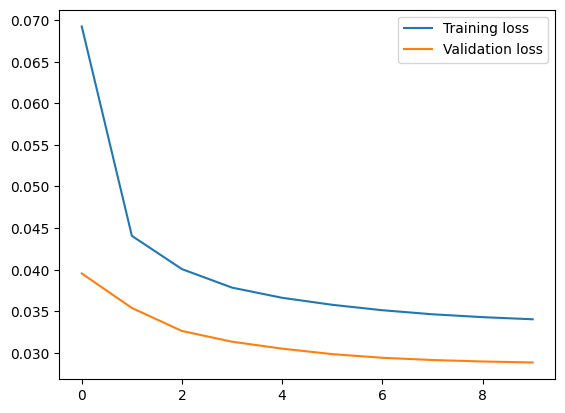

In [16]:
# Define the number of epochs
epochs = 10

# Generate some data
data = torch.randn(1000, 1)
labels = torch.sin(data)
train_validation_split = int(0.8 * len(data))

# Split the data into training and validation
train_input = data[:train_validation_split]
train_target = labels[:train_validation_split]

validation_input = data[train_validation_split:]
validation_target = labels[train_validation_split:]

# Create the model, loss function and optimizer
model = SineNeuralNetwork()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epoch_losses = []
validation_losses = []

# Train the model
for epoch in trange(epochs):

    epoch_loss = 0
    for input, target in zip(train_input, train_target):
    
        # Forward pass
        output = model(input)
        loss = criterion(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    epoch_losses.append(epoch_loss/len(train_input))
    

    # Calculate the validation loss for visualizing the model's performance
    validation_loss = 0
    for input, target in zip(validation_input, validation_target):
        output = model(input)
        loss = criterion(output, target)
        validation_loss += loss.item()
    
    validation_losses.append(validation_loss/len(validation_input))

# Plot the training and validation losses
plt.plot(epoch_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend()



In [ ]:
predictions = model(validation_input)
plt.scatter(validation_input, validation_target, label='True values')
plt.scatter(validation_input, predictions.detach().numpy(), label='Predictions')

## Task 2: Train the Neural Network
Try to improve the performance of the neural network by training it on the given dataset.

Recommended Steps:
* Try to change the number of epochs
* Try to change the learning rate
* Try to change the neural network architecture
  * Add more hidden layers
  * Add more neurons to the hidden layers
* Try to change the optimizer
* Try to change the loss function

In [ ]:
# TODO Try 
epochs = 10

data = torch.randn(1000, 1)
labels = torch.sin(data)
train_validation_split = 0.8 * len(data)
train_input = data[:train_validation_split]
train_target = labels[:train_validation_split]
validation_input = data[train_validation_split:]
validation_target = labels[train_validation_split:]

true_values = torch.sin(inputs)


validation_inputs = torch.randn(1000, 1)
validation_true_values = torch.sin(validation_inputs)

model = SineNeuralNetwork()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epoch_losses = []
validation_losses = []

for epoch in trange(epochs):

    epoch_loss = 0
    for input, true_value in zip(inputs, true_values):
        output = model(input)
        loss = criterion(output, true_value)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    epoch_losses.append(epoch_loss/len(inputs))
    
    validation_loss = 0
    for input, true_value in zip(validation_inputs, validation_true_values):
        output = model(input)
        loss = criterion(output, true_value)
        validation_loss += loss.item()
    
    validation_losses.append(validation_loss/len(validation_inputs))

plt.plot(epoch_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend()



## Task 4: Competition